In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Dataset

In [2]:
df = pd.read_csv('data/simple_loan.csv', encoding='utf-8')
df

,age,employed,own_house,credit,target
0,young,False,n,fair,no
1,young,False,n,good,no
2,young,True,n,good,yes
3,young,True,y,fair,yes
4,young,False,n,fair,no
5,middle,False,n,fair,no
6,middle,False,n,good,no
7,middle,True,y,good,yes
8,middle,False,y,excellent,yes
9,middle,False,y,excellent,yes


In [3]:
df.isnull().sum()

age          0
employed     0
own_house    0
credit       0
target       0
dtype: int64

In [4]:
df.target.unique()

array(['no', 'yes'], dtype=object)

In [5]:
df.groupby('target').count()

,age,employed,own_house,credit
target,,,,
no,6,6,6,6
yes,11,11,11,11


In [6]:
df.columns

Index(['age', 'employed', 'own_house', 'credit', 'target'], dtype='object')

In [7]:
X = df.drop(['target'], axis=1)
X.head()

,age,employed,own_house,credit
0,young,False,n,fair
1,young,False,n,good
2,young,True,n,good
3,young,True,y,fair
4,young,False,n,fair


In [8]:
y = df.target
y.head()

0     no
1     no
2    yes
3    yes
4     no
Name: target, dtype: object

## Label Encoding
เข้ารหัส เปลี่ยน ข้อความ -> ตัวเลข
- <b>age</b> : middle, old, young  
middle -> 0 <br>old -> 1   
young -> 2
- <b>own_house</b>:  n -> 0  ,   y -> 1

In [9]:
def labelEncode(data, column):
    for col in column:
        data[col + '_'], _ = pd.factorize(data[col], sort=True)

feature_cols = ['age','employed','own_house','credit']
labelEncode(df, feature_cols)
df

,age,employed,own_house,credit,target,age_,employed_,own_house_,credit_
0,young,False,n,fair,no,2,0,0,1
1,young,False,n,good,no,2,0,0,2
2,young,True,n,good,yes,2,1,0,2
3,young,True,y,fair,yes,2,1,1,1
4,young,False,n,fair,no,2,0,0,1
5,middle,False,n,fair,no,0,0,0,1
6,middle,False,n,good,no,0,0,0,2
7,middle,True,y,good,yes,0,1,1,2
8,middle,False,y,excellent,yes,0,0,1,0
9,middle,False,y,excellent,yes,0,0,1,0


In [10]:
df['target_'], class_name = pd.factorize(df.target)
df.head()

,age,employed,own_house,credit,target,age_,employed_,own_house_,credit_,target_
0,young,False,n,fair,no,2,0,0,1,0
1,young,False,n,good,no,2,0,0,2,0
2,young,True,n,good,yes,2,1,0,2,1
3,young,True,y,fair,yes,2,1,1,1,1
4,young,False,n,fair,no,2,0,0,1,0


In [11]:
class_name

Index(['no', 'yes'], dtype='object')

In [12]:
df.columns

Index(['age', 'employed', 'own_house', 'credit', 'target', 'age_', 'employed_',
       'own_house_', 'credit_', 'target_'],
      dtype='object')

In [13]:
enc_columns = [
    'age_',
    'employed_',
    'own_house_',
    'credit_'
]

In [14]:
X = df[enc_columns]
X

,age_,employed_,own_house_,credit_
0,2,0,0,1
1,2,0,0,2
2,2,1,0,2
3,2,1,1,1
4,2,0,0,1
5,0,0,0,1
6,0,0,0,2
7,0,1,1,2
8,0,0,1,0
9,0,0,1,0


In [15]:
y = df.target_
y

0     0
1     0
2     1
3     1
4     0
5     0
6     0
7     1
8     1
9     1
10    1
11    1
12    1
13    1
14    0
15    1
16    1
Name: target_, dtype: int64

## Split Dataset

In [16]:
from sklearn.model_selection import train_test_split

X_train,X_test , y_train,y_test = train_test_split(X, y, test_size=0.3, random_state=20)

In [17]:
X_train.shape, X_test.shape

((11, 4), (6, 4))

In [18]:
y_train.shape, y_test.shape

((11,), (6,))

In [19]:
X_train

,age_,employed_,own_house_,credit_
13,1,1,0,0
0,2,0,0,1
2,2,1,0,2
7,0,1,1,2
6,0,0,0,2
4,2,0,0,1
9,0,0,1,0
15,1,0,0,0
12,1,1,0,2
10,1,0,1,0


In [20]:
y_train

13    1
0     0
2     1
7     1
6     0
4     0
9     1
15    1
12    1
10    1
3     1
Name: target_, dtype: int64

## Model & Training

In [21]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [22]:
model_score = model.score(X_test, y_test)
print('score =', (model_score.round(4))*100, '/ 100')

score = 83.33 / 100


In [23]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

yPredict = model.predict(X_test)

print('score -> {:.2f}'.format(model.score(X_test, y_test)))
print('accuracy_score: ', accuracy_score(y_test, yPredict).round(2))

print(classification_report(y_test, yPredict, target_names=class_name))

print(confusion_matrix(y_test, yPredict))

score -> 0.83
accuracy_score:  0.83
              precision    recall  f1-score   support

          no       0.75      1.00      0.86         3
         yes       1.00      0.67      0.80         3

    accuracy                           0.83         6
   macro avg       0.88      0.83      0.83         6
weighted avg       0.88      0.83      0.83         6

[[3 0]
 [1 2]]


In [24]:
print(np.array(y_test), ' <= True result')
print(yPredict, '<= Predicted result')

[1 0 0 1 1 0]  <= True result
[1 0 0 0 1 0] <= Predicted result


## Evaluation

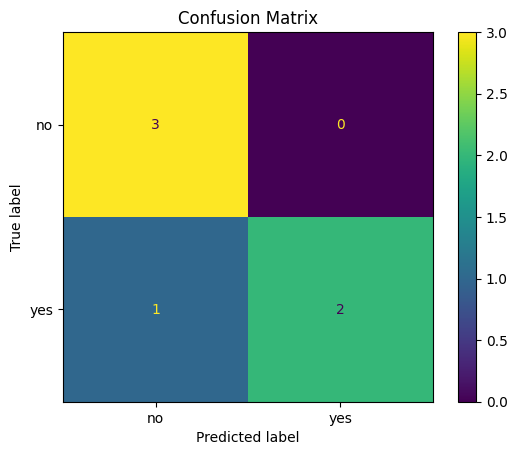

In [25]:
from sklearn.metrics import ConfusionMatrixDisplay

labels = class_name

cm = confusion_matrix(y_test, yPredict)
ConfusionMatrixDisplay(cm, display_labels=labels).plot()
plt.title('Confusion Matrix')
plt.show()

In [26]:
model.feature_importances_

# age employed own_house credit

array([0.    , 0.3125, 0.    , 0.6875])

## Visualization

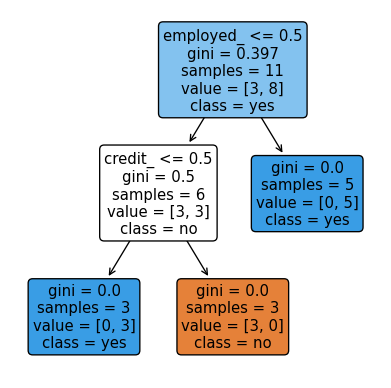

In [33]:
from sklearn.tree import plot_tree

plt.subplots(nrows=1, ncols=1, figsize=(5,5), dpi=96)

plot_tree(model, filled=True, rounded=True, feature_names=enc_columns, class_names=class_name)
plt.show()

## Prediction (CSV input)

In [34]:
datainput = pd.read_csv('data/simple_loan_predict.csv')
datainput

,id,name,age,employed,own_house,credit
0,101,Kob,middle,True,y,fair
1,102,Cala,old,False,n,good
2,103,Alex,old,True,n,fair
3,104,Tim,young,False,y,fair
4,105,Joy,middle,False,n,fair
5,106,Jib,middle,False,y,excellent


In [35]:
feature_cols

['age', 'employed', 'own_house', 'credit']

In [36]:
labelEncode(datainput, feature_cols)
datainput.head()

,id,name,age,employed,own_house,credit,age_,employed_,own_house_,credit_
0,101,Kob,middle,True,y,fair,0,1,1,1
1,102,Cala,old,False,n,good,1,0,0,2
2,103,Alex,old,True,n,fair,1,1,0,1
3,104,Tim,young,False,y,fair,2,0,1,1
4,105,Joy,middle,False,n,fair,0,0,0,1


In [37]:
enc_columns

['age_', 'employed_', 'own_house_', 'credit_']

In [38]:
X_input = datainput[enc_columns]
X_input

,age_,employed_,own_house_,credit_
0,0,1,1,1
1,1,0,0,2
2,1,1,0,1
3,2,0,1,1
4,0,0,0,1
5,0,0,1,0


In [39]:
predictedResult = model.predict(X_input)
datainput['predict'] = predictedResult
datainput

,id,name,age,employed,own_house,credit,age_,employed_,own_house_,credit_,predict
0,101,Kob,middle,True,y,fair,0,1,1,1,1
1,102,Cala,old,False,n,good,1,0,0,2,0
2,103,Alex,old,True,n,fair,1,1,0,1,1
3,104,Tim,young,False,y,fair,2,0,1,1,0
4,105,Joy,middle,False,n,fair,0,0,0,1,0
5,106,Jib,middle,False,y,excellent,0,0,1,0,1


In [45]:
datainput['result'] = class_name[datainput.predict]
displayCols = feature_cols + ['result']
print('result data')

datainput[displayCols]

result data


,age,employed,own_house,credit,result
0,middle,True,y,fair,yes
1,old,False,n,good,no
2,old,True,n,fair,yes
3,young,False,y,fair,no
4,middle,False,n,fair,no
5,middle,False,y,excellent,yes
